Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/philosopher/'

N = 5_000
M = 10_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}5/philosopher_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}5/philosopher_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}5/philosopher_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}5/philosopher_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 06:42:35 2025 +0200) (511.37ms ela...,1.9400,0.00621,0.435,2.21,0.30,20.58,52.66 C,Nominal
1,(Mon Mar 31 06:42:36 2025 +0200) (508.57ms ela...,1.2100,0.02860,0.385,1.42,0.24,21.20,54.01 C,Nominal
2,(Mon Mar 31 06:42:36 2025 +0200) (509.13ms ela...,0.0655,0.00000,0.262,0.12,0.03,2.38,53.71 C,Nominal
3,(Mon Mar 31 06:42:37 2025 +0200) (508.44ms ela...,0.3460,0.00000,0.266,0.48,0.20,14.39,53.71 C,Nominal
4,(Mon Mar 31 06:42:37 2025 +0200) (508.10ms ela...,0.0500,0.00000,0.233,0.08,0.03,2.02,53.36 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(650, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 06:42:47 2025 +0200) (1008.16ms el...,35.5,0.0,1.070,36.38,3.85,97.53,52.55 C,Nominal
1,(Mon Mar 31 06:42:48 2025 +0200) (1005.22ms el...,33.3,0.0,0.533,33.99,3.85,97.35,56.34 C,Nominal
2,(Mon Mar 31 06:42:49 2025 +0200) (1007.66ms el...,33.9,0.0,0.520,34.47,3.82,97.07,59.16 C,Nominal
3,(Mon Mar 31 06:42:50 2025 +0200) (1006.13ms el...,33.4,0.0,0.529,34.04,3.85,97.39,61.48 C,Nominal
4,(Mon Mar 31 06:42:51 2025 +0200) (1005.65ms el...,33.6,0.0,0.533,34.25,3.84,97.29,63.36 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 06:56:54 2025 +0200) (511.56ms ela...,0.1340,0.0000,0.267,0.21,0.06,4.23,46.19 C,Nominal
1,(Mon Mar 31 06:56:55 2025 +0200) (509.05ms ela...,0.1500,0.0342,0.393,0.28,0.08,4.79,46.19 C,Nominal
2,(Mon Mar 31 06:56:55 2025 +0200) (509.39ms ela...,1.0800,0.0000,0.294,1.21,0.20,16.70,46.36 C,Nominal
3,(Mon Mar 31 06:56:56 2025 +0200) (508.37ms ela...,0.0687,0.0000,0.257,0.12,0.04,2.96,46.36 C,Nominal
4,(Mon Mar 31 06:56:56 2025 +0200) (508.38ms ela...,0.0700,0.0000,0.265,0.12,0.03,2.53,46.32 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(2394, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 06:57:06 2025 +0200) (1007.53ms el...,26.0,0.0,0.774,26.69,3.65,96.23,49.29 C,Nominal
1,(Mon Mar 31 06:57:07 2025 +0200) (1005.42ms el...,25.7,0.0,0.767,26.40,3.64,96.86,51.92 C,Nominal
2,(Mon Mar 31 06:57:08 2025 +0200) (1005.36ms el...,26.0,0.0,0.771,26.77,3.67,96.45,54.17 C,Nominal
3,(Mon Mar 31 06:57:09 2025 +0200) (1004.46ms el...,25.9,0.0,0.771,26.56,3.62,96.15,56.11 C,Nominal
4,(Mon Mar 31 06:57:10 2025 +0200) (1006.22ms el...,25.7,0.0,0.787,26.46,3.63,96.72,57.77 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 06:42:35,1.9400,0.00621,0.435,2.21,0.30,20.58,52.66,Nominal,511.37
1,2025-03-31 06:42:36,1.2100,0.02860,0.385,1.42,0.24,21.20,54.01,Nominal,508.57
2,2025-03-31 06:42:36,0.0655,0.00000,0.262,0.12,0.03,2.38,53.71,Nominal,509.13
3,2025-03-31 06:42:37,0.3460,0.00000,0.266,0.48,0.20,14.39,53.71,Nominal,508.44
4,2025-03-31 06:42:37,0.0500,0.00000,0.233,0.08,0.03,2.02,53.36,Nominal,508.10


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(650, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 06:42:47,35.5,0.0,1.070,36.38,3.85,97.53,52.55,Nominal,1008.16
1,2025-03-31 06:42:48,33.3,0.0,0.533,33.99,3.85,97.35,56.34,Nominal,1005.22
2,2025-03-31 06:42:49,33.9,0.0,0.520,34.47,3.82,97.07,59.16,Nominal,1007.66
3,2025-03-31 06:42:50,33.4,0.0,0.529,34.04,3.85,97.39,61.48,Nominal,1006.13
4,2025-03-31 06:42:51,33.6,0.0,0.533,34.25,3.84,97.29,63.36,Nominal,1005.65


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 06:56:54,0.1340,0.0000,0.267,0.21,0.06,4.23,46.19,Nominal,511.56
1,2025-03-31 06:56:55,0.1500,0.0342,0.393,0.28,0.08,4.79,46.19,Nominal,509.05
2,2025-03-31 06:56:55,1.0800,0.0000,0.294,1.21,0.20,16.70,46.36,Nominal,509.39
3,2025-03-31 06:56:56,0.0687,0.0000,0.257,0.12,0.04,2.96,46.36,Nominal,508.37
4,2025-03-31 06:56:56,0.0700,0.0000,0.265,0.12,0.03,2.53,46.32,Nominal,508.38


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(2394, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 06:57:06,26.0,0.0,0.774,26.69,3.65,96.23,49.29,Nominal,1007.53
1,2025-03-31 06:57:07,25.7,0.0,0.767,26.40,3.64,96.86,51.92,Nominal,1005.42
2,2025-03-31 06:57:08,26.0,0.0,0.771,26.77,3.67,96.45,54.17,Nominal,1005.36
3,2025-03-31 06:57:09,25.9,0.0,0.771,26.56,3.62,96.15,56.11,Nominal,1004.46
4,2025-03-31 06:57:10,25.7,0.0,0.787,26.46,3.63,96.72,57.77,Nominal,1006.22


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


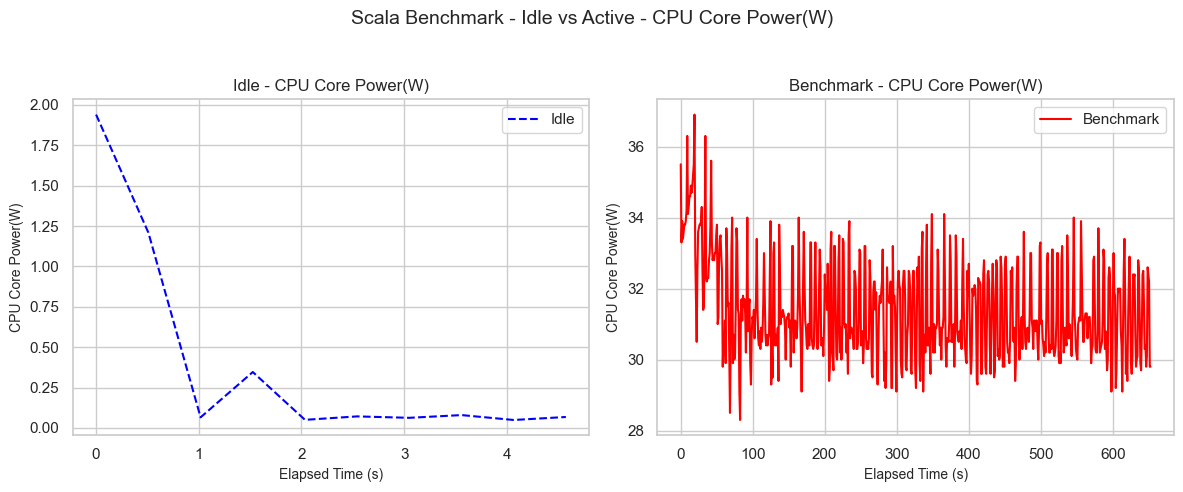

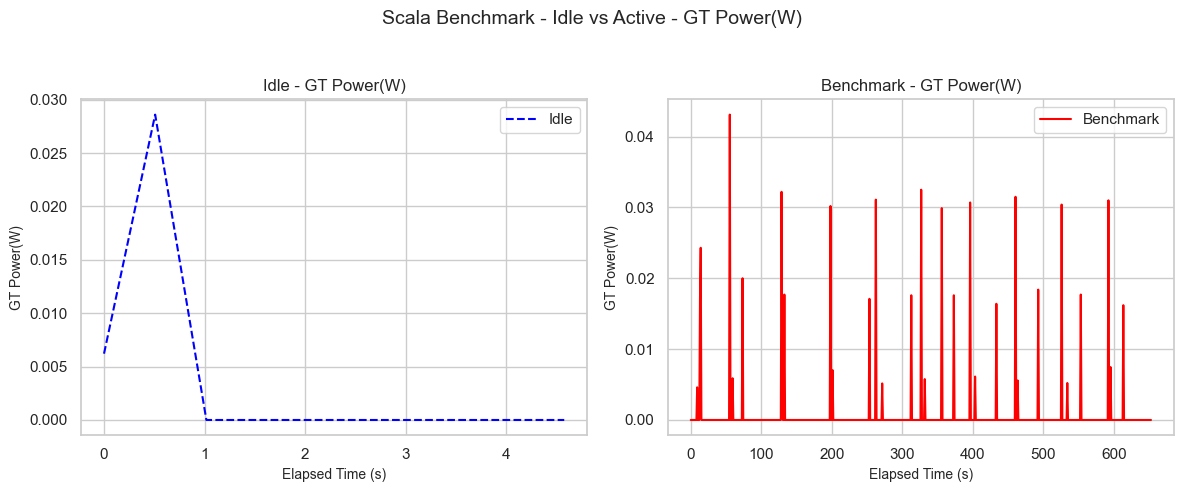

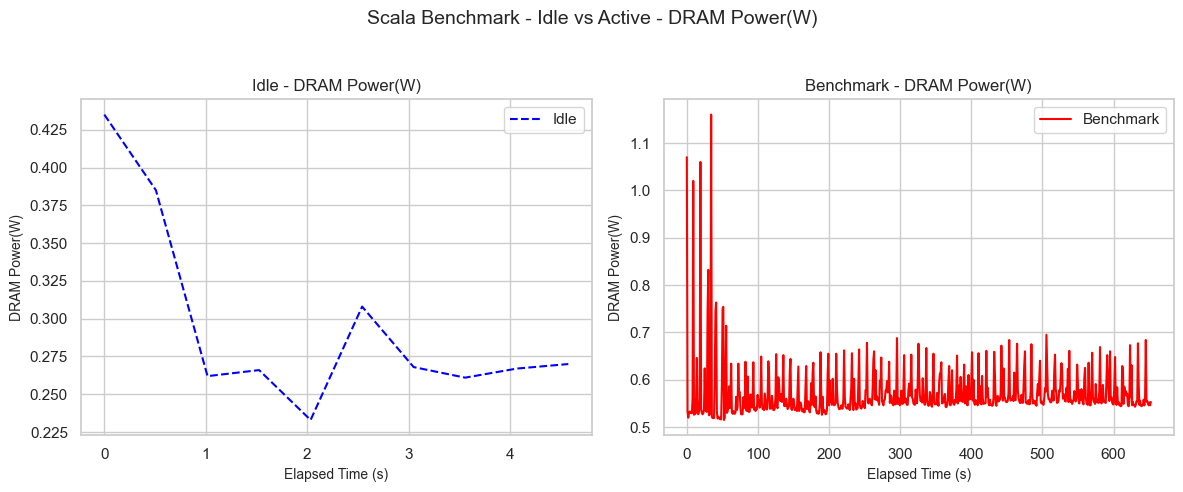

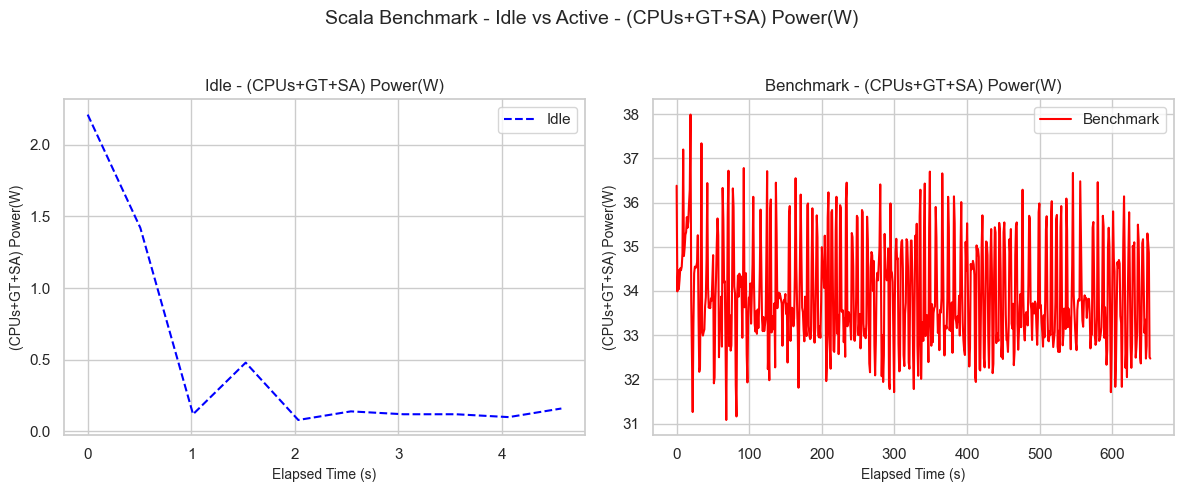

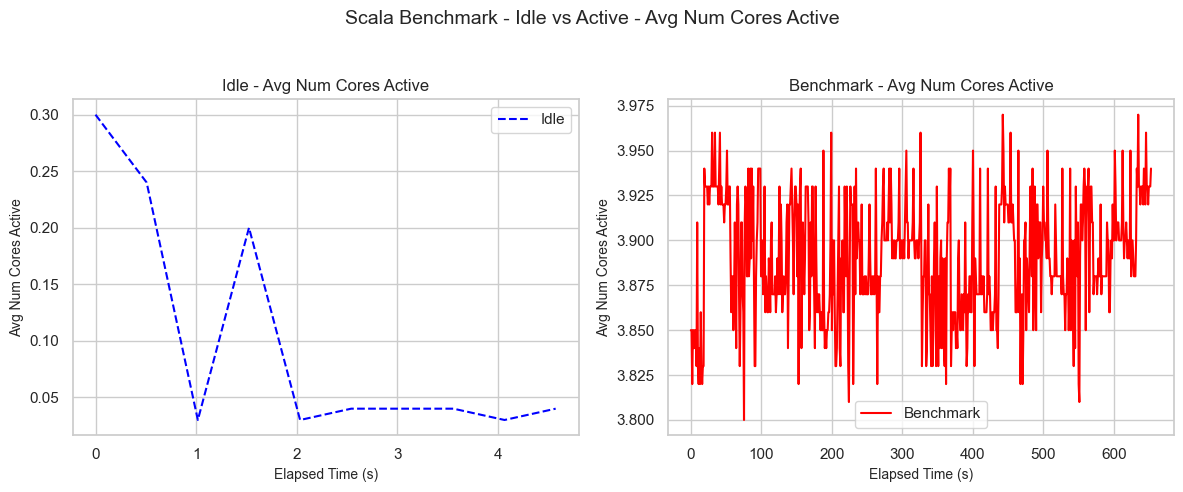

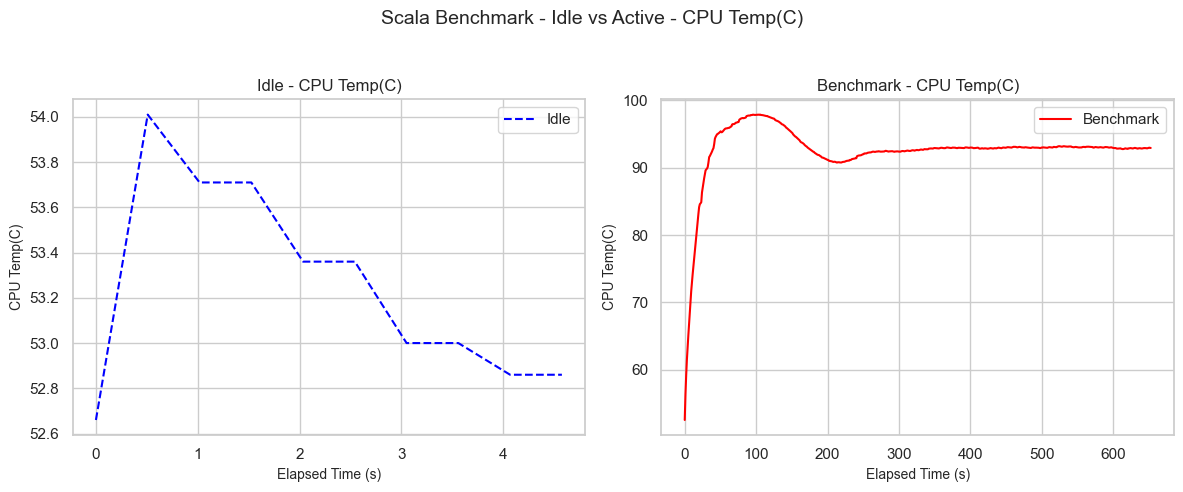

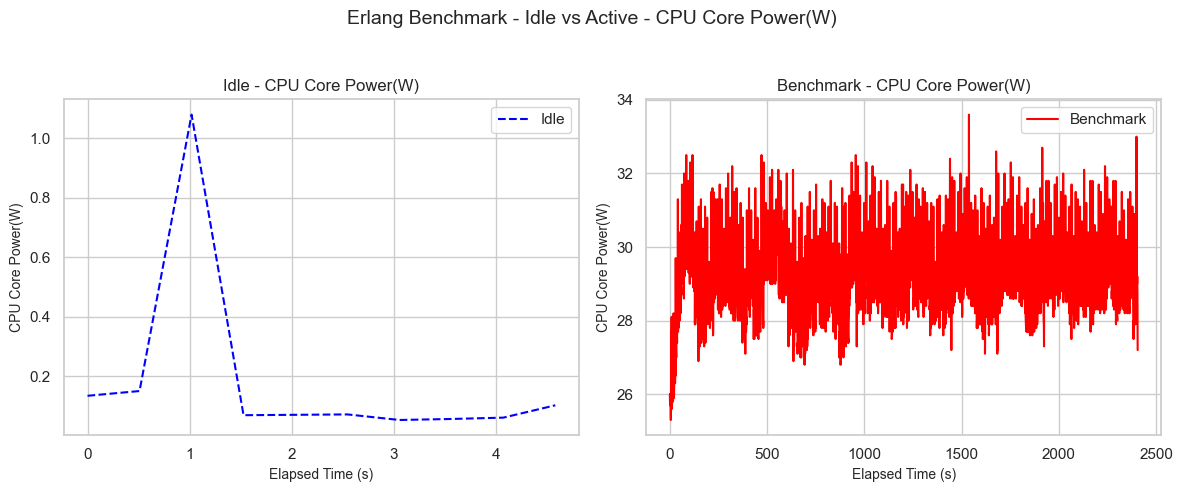

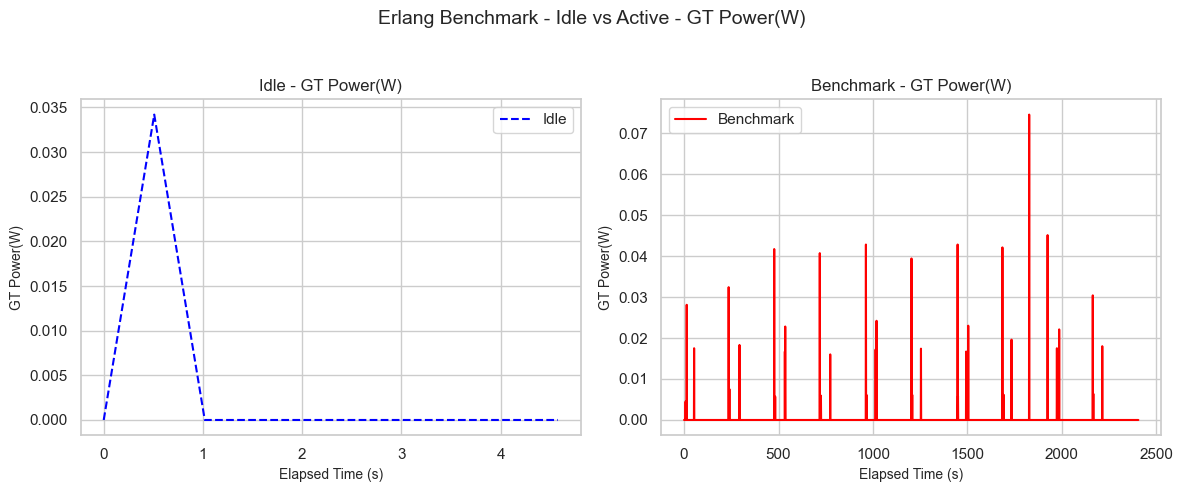

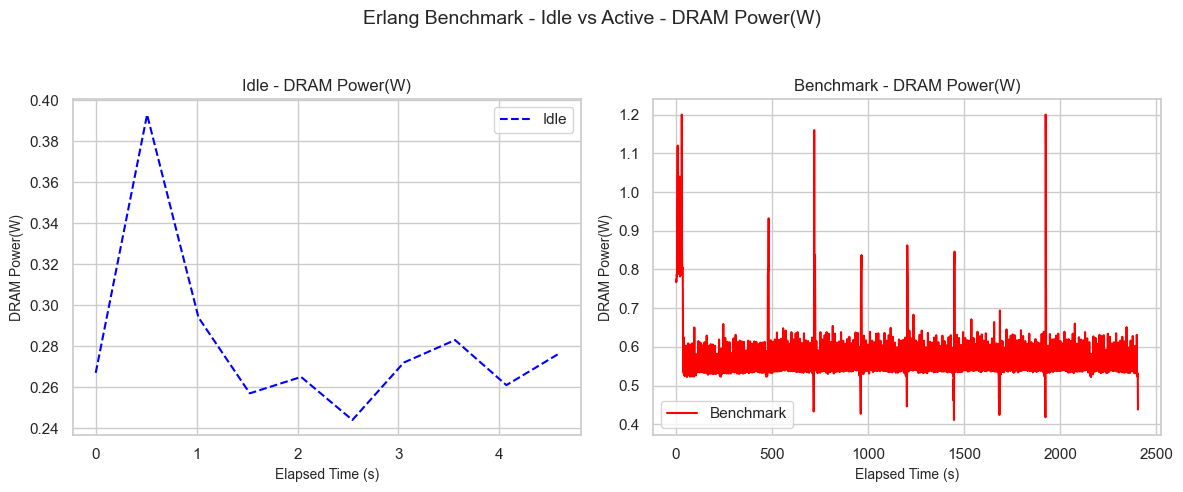

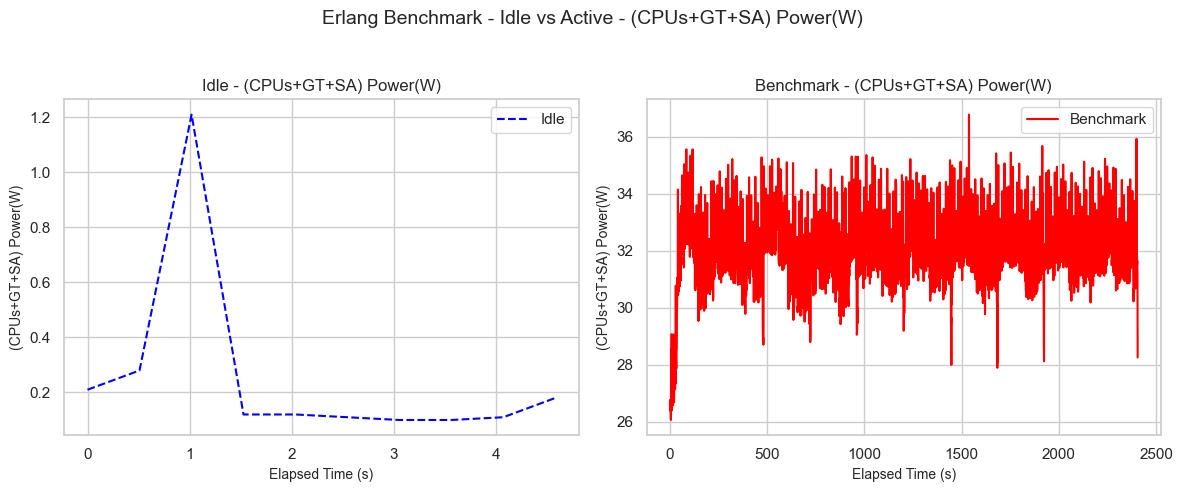

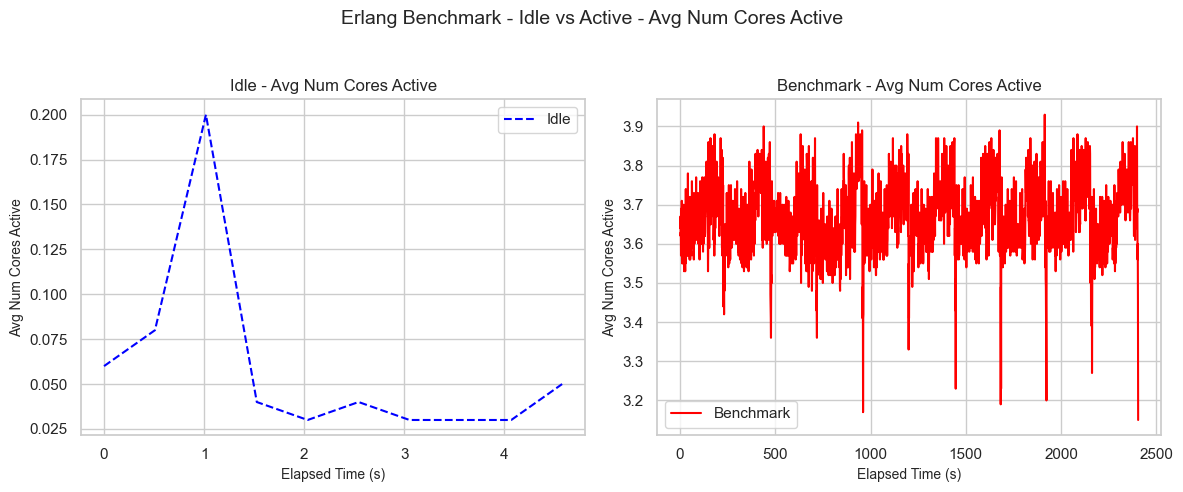

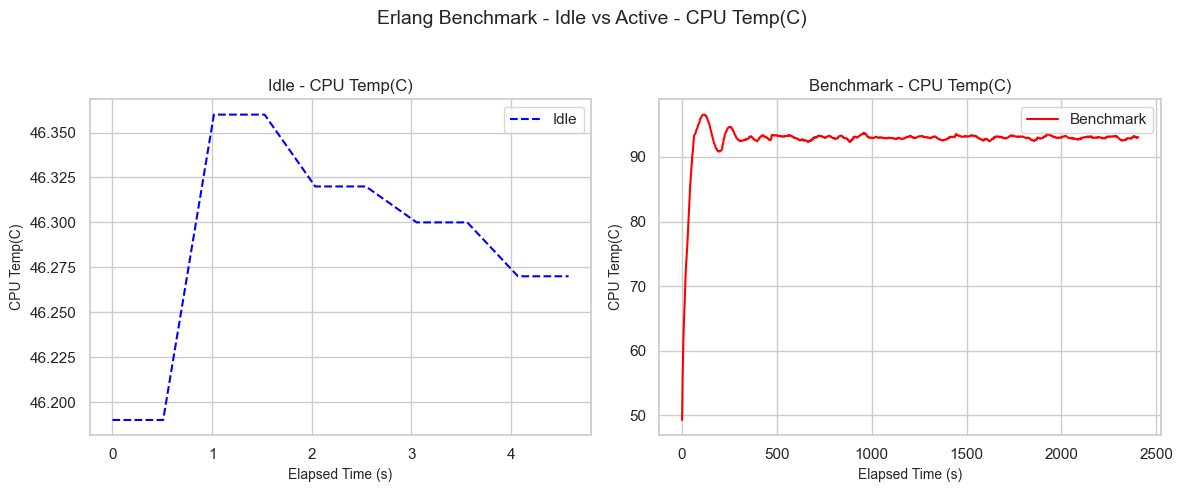

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(num):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}B"
    elif num >= 1_000_000:
        return f"{num // 1_000_000}M"
    elif num >= 1_000:
        return f"{num // 1_000}K"
    return str(num)

n = format_number_str(N)
m = format_number_str(M)
title_config_prefix = f"({n} Philosophers, {m} Eating Rounds, {ITERATIONS} Iterations)"

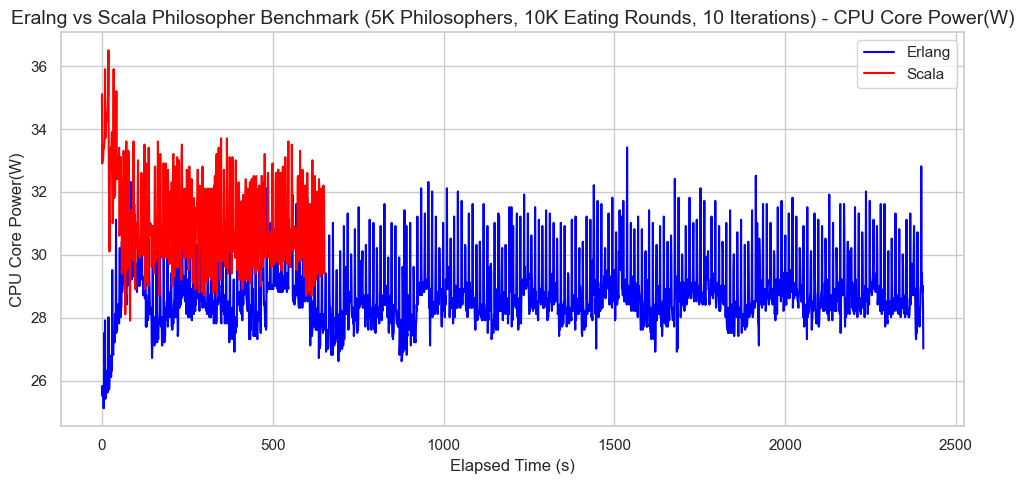

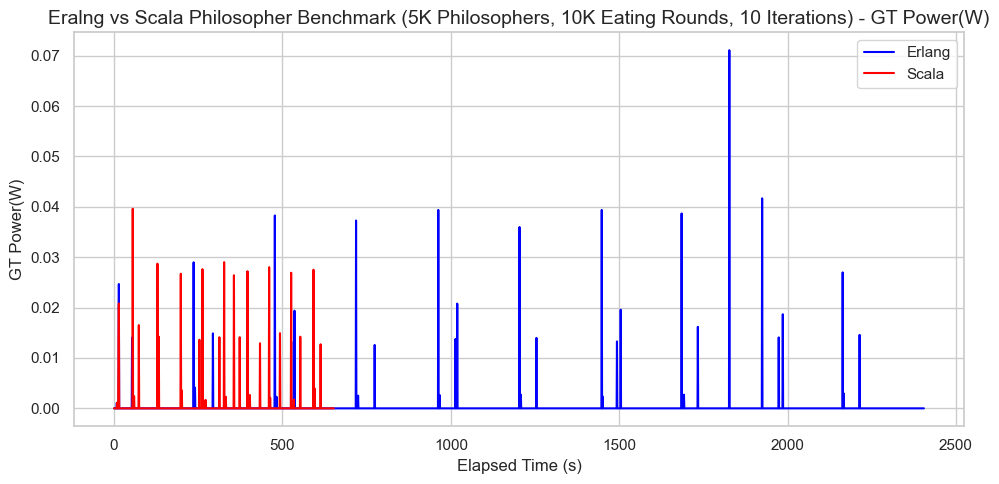

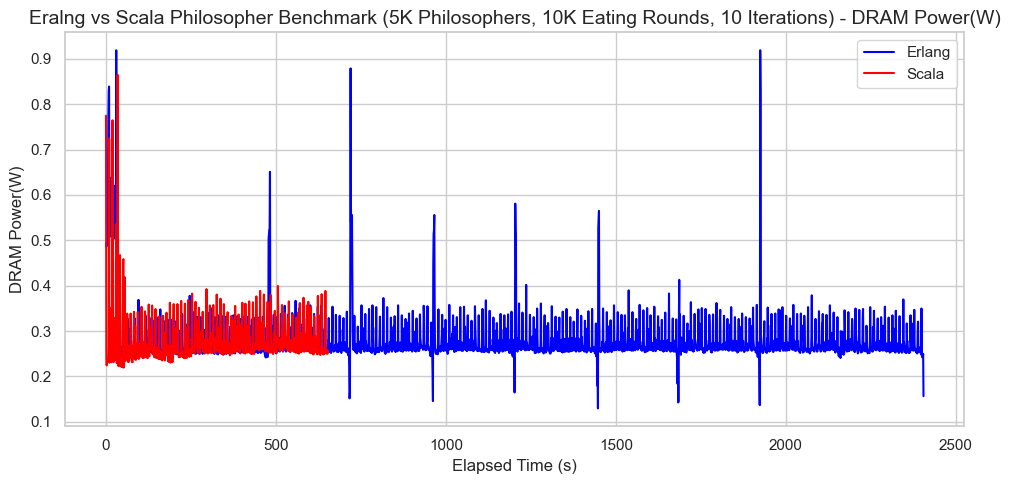

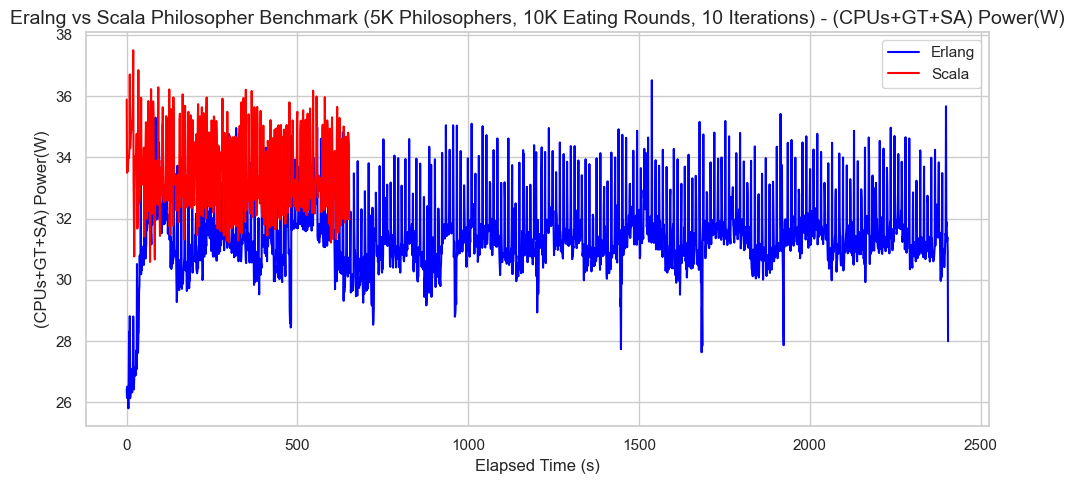

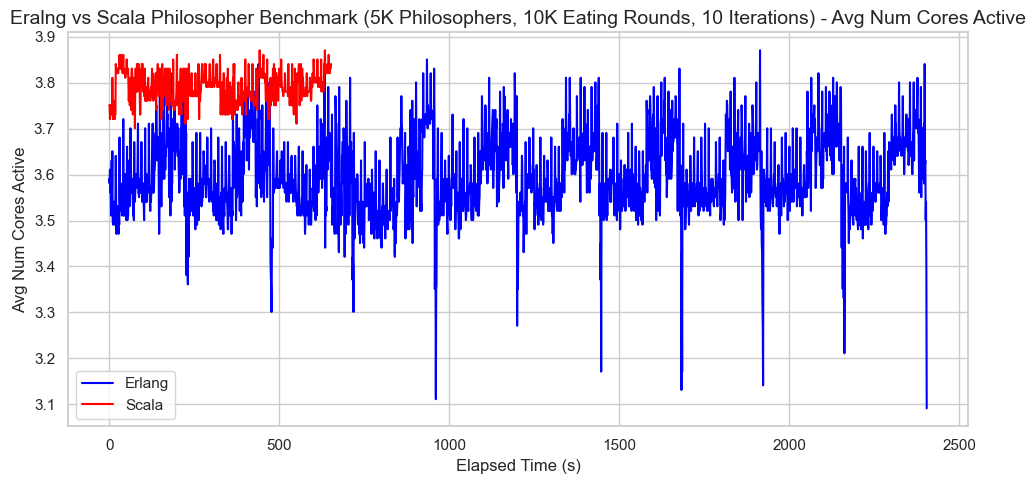

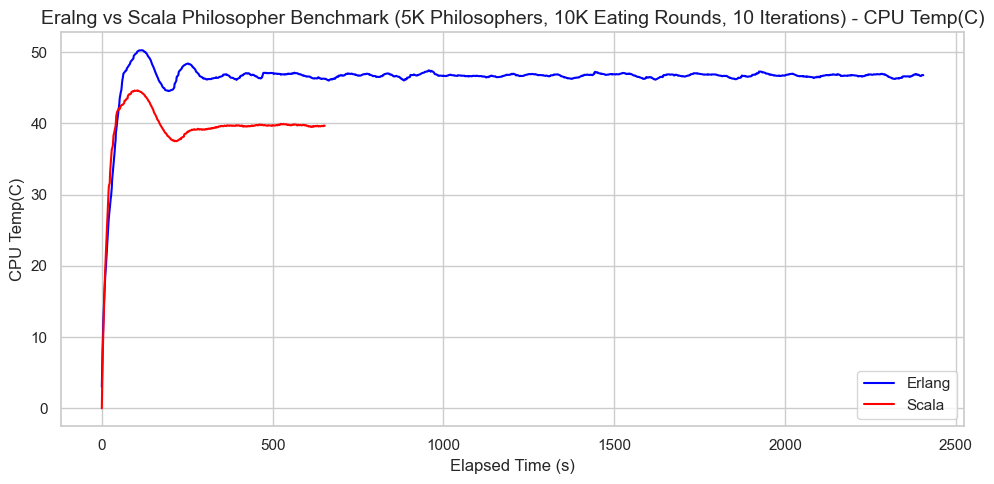

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Philosopher Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        31.004783
GT Power(W)              -0.002587
DRAM Power(W)             0.275575
(CPUs+GT+SA) Power(W)    33.418046
CPU Temp(C)              39.311508
Avg Num Cores Active      3.791446
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        28.690553
GT Power(W)              -0.003094
DRAM Power(W)             0.277656
(CPUs+GT+SA) Power(W)    31.364312
CPU Temp(C)              46.375312
Avg Num Cores Active      3.597424
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "M": M,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["M"] == M) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "M =", M, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/philosopher/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 21836.11696436046 Joules
Erlang Benchmark: 75454.29038527404 Joules
